In [1]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 40B8-E79D

 Directory of C:\Users\kosma\Desktop\MGU\NNVisualiser\data_analysis\projekt1

18.03.2019  13:00    <DIR>          .
18.03.2019  13:00    <DIR>          ..
17.03.2019  17:06    <DIR>          .ipynb_checkpoints
17.03.2019  16:59    <DIR>          classification
18.03.2019  12:55            93˙007 data_analysis.ipynb
18.03.2019  13:00            10˙728 multiclassification.ipynb
17.03.2019  16:59    <DIR>          regression
18.03.2019  12:18           168˙757 regression.ipynb
               3 File(s)        272˙492 bytes
               5 Dir(s)  29˙865˙738˙240 bytes free


In [2]:
import sys,os 


In [3]:
import deep_nn.deep_nn_model as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [55]:
train = pd.read_csv("./data_analysis/projekt1/classification/data.three_gauss.train.100.csv")
len(train)

300

In [56]:
X = train[['x', 'y']].values.T
print(X.shape)
Y = train.cls.values.reshape(1, len(train))
print(Y.shape)

(2, 300)
(1, 300)


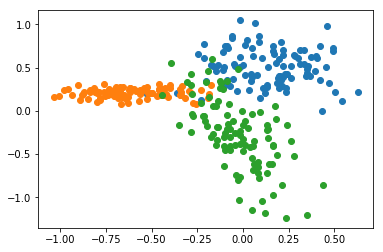

In [47]:
for i in range(1,4):
    traini = train[train.cls == i]
    plt.plot(traini.x,traini.y,'o')
    
plt.show()

In [5]:
print(train.x[0])

0.493589159322043


In [59]:
X = train[['x', 'y']].values.reshape(2, len(train))
X.shape
y = train.cls.values.reshape(1, len(train))
y.shape

(1, 300)

In [60]:
enc = OneHotEncoder()
Y = enc.fit_transform(train.cls.values.reshape(-1,1))

C:\Users\kosma\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [8]:
from IPython.core.debugger import set_trace

In [ ]:
model_builder = nn.SequentialBuilder()
model_builder.add_dense(2, "relu")
model_builder.add_dense(12, "relu")
model_builder.add_dense(7, "relu")
model_builder.add_dense(3, "softmax")
model = model_builder.compile("categorical_crossentropy")

parameters, costs = model.fit(X, Y.T.A,
                      learning_rate=0.1,
                      momentum=0.9,
                      num_epochs=18000,
                      mini_batch_size=64)


Cost after epoch 0: 1.112490
Cost after epoch 1000: 0.759051
Cost after epoch 2000: 0.508173
Cost after epoch 3000: 0.461163
Cost after epoch 4000: 0.428622
Cost after epoch 5000: 0.565178
Cost after epoch 6000: 0.664945
Cost after epoch 7000: 0.734587
Cost after epoch 8000: 0.552796
Cost after epoch 9000: 0.446084


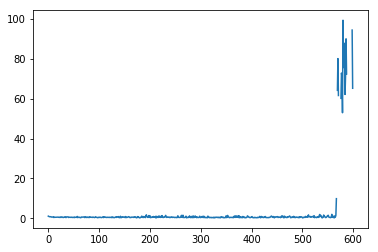

In [66]:
plt.plot(costs)

In [16]:
print(costs[-1])

0.2592593634939321


In [ ]:
parameters2, costs2 = nn.model(X, Y.T.A, 
         layers_dims=[2, 12, 12, 12, 12, 3],
         layers_activations=["relu", "relu", "relu", "relu", "relu", "softmax"], 
         cost_func="categorical_crossentropy",
         beta=0.9, num_epochs=4001, learning_rate=0.1)

In [ ]:
plt.plot(costs2)

In [75]:
def plot_decision_boundary(model, X, y ,colors=[]):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    if colors ==[]:
        plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral)
    else:
        plt.contourf(xx, yy, Z, colors = colors)
        plt.ylabel('x2')
        plt.xlabel('x1')
        plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=colors)

    plt.show()
    

In [23]:
p = model.predict_classes(X)

In [21]:
predicted_classes = np.argmax(p, axis=0) + 1

In [26]:
indexer = (y.T == 1).reshape(-1,)

In [28]:
X.T[(y.T == 0).reshape(-1,)]

array([], shape=(0, 2), dtype=float64)

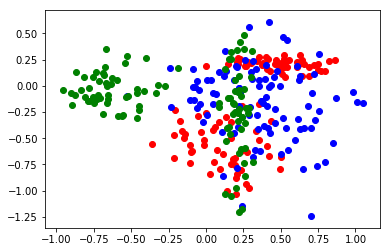

In [29]:
first_class_positions = X.T[(y.T == 1).reshape(-1,)]
second_class_positions = X.T[(y.T == 2).reshape(-1,)]
third_class_positions = X.T[(y.T == 3).reshape(-1,)]
plt.scatter(first_class_positions[:,0], first_class_positions[:,1] , c = 'red')
plt.scatter(second_class_positions[:,0], second_class_positions[:,1] , c = 'blue')
plt.scatter(third_class_positions[:,0], third_class_positions[:,1] , c = 'green')
plt.show()

In [30]:
first_class_positions = X.T[(predicted_classes.T == 1).reshape(-1,)]
second_class_positions = X.T[(predicted_classes.T == 2).reshape(-1,)]
third_class_positions = X.T[(predicted_classes.T == 3).reshape(-1,)]
plt.scatter(first_class_positions[:,0], first_class_positions[:,1] , c = 'red')
plt.scatter(second_class_positions[:,0], second_class_positions[:,1] , c = 'blue')
plt.scatter(third_class_positions[:,0], third_class_positions[:,1] , c = 'green')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 300 but corresponding boolean dimension is 1

In [51]:
X

array([[ 4.93589159e-01,  6.90757595e-01,  7.63210616e-02,
         4.15932945e-01,  5.26379290e-02,  3.96234863e-01,
         2.34967936e-01,  2.68791616e-01,  1.69118457e-01,
         6.58724634e-01,  4.07911449e-01,  6.09613755e-01,
         9.26938540e-02,  1.47855193e-01, -2.13604972e-01,
         7.69541980e-01,  2.01191796e-01,  4.07078047e-01,
         1.31707553e-01,  2.78958647e-01,  2.66131514e-01,
         5.21290795e-01,  8.91740035e-02,  8.63741655e-01,
        -1.36872704e-01,  5.25238004e-01,  5.03955823e-01,
         2.13837253e-01,  1.64522760e-01,  6.87511466e-01,
        -1.48935828e-01,  4.59742274e-01,  3.58127344e-01,
         5.23594406e-01,  2.40495025e-01,  4.28031349e-01,
         1.98424614e-01,  2.62382078e-01,  1.38230987e-01,
         5.09216737e-01, -3.62952332e-01,  2.08922015e-01,
         2.85363530e-01,  6.39620618e-01,  2.47886244e-02,
         8.25149887e-01,  1.82410054e-01,  5.54525777e-01,
        -1.32998924e-02,  5.06840642e-01,  4.97148520e-0

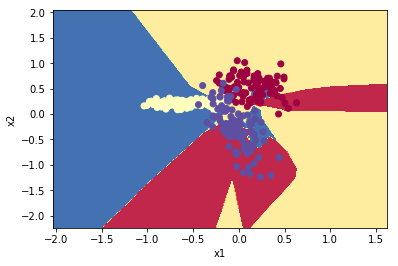

In [83]:
plot_decision_boundary(lambda x: model.predict_classes(x.T) , X, Y)

In [ ]:
parameters, costs = nn.model(X, Y.T.A, 
         layers_dims=[2, 12, 12, 12, 12, 3],
         layers_activations=["relu", "relu", "relu", "relu", "relu", "softmax"], 
         cost_func="categorical_crossentropy",
         beta=0, learning_rate=0.01, num_epochs=50000, mini_batch_size=512)

In [ ]:
plt.plot(costs)